<a href="https://colab.research.google.com/github/arahmanmdmajid/DS_AI_11/blob/main/CV_Module_Assignment_1_Improve_Accuracy_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision - CNNs for Image Classification

## Dataset: CIFAR10 | Framework: Keras (Tensorflow)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import clone_model, Model
from sklearn.model_selection import train_test_split

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Traning set labels: {y_train.shape}")
print(f"Test set labels: {y_test.shape}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Traning set labels: (50000, 1)
Test set labels: (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

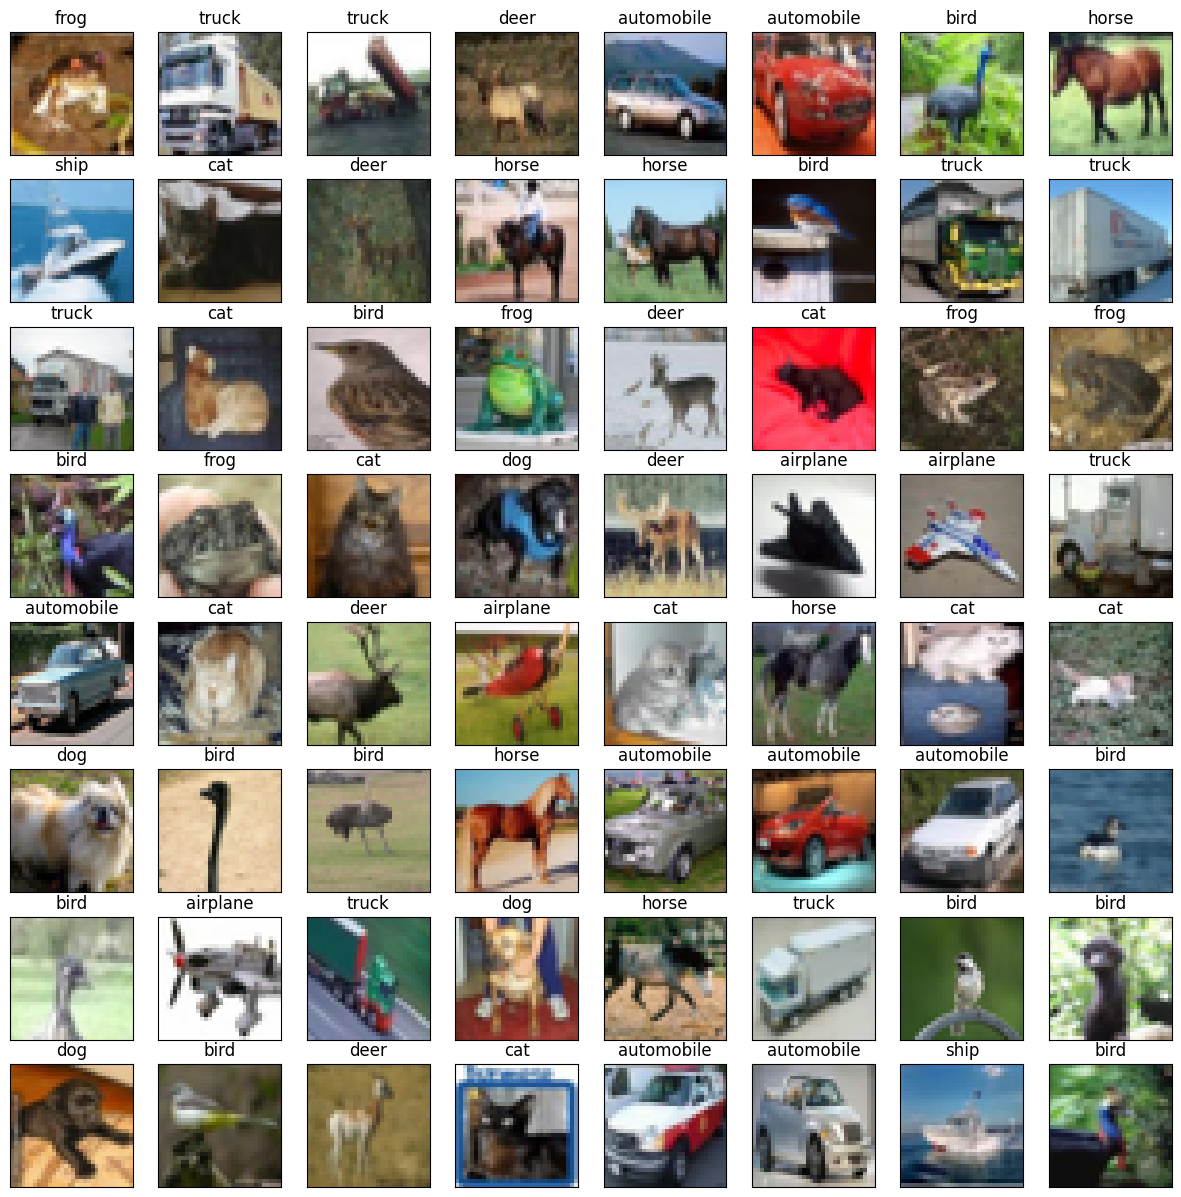

In [5]:
plt.figure(figsize=(15,15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [6]:
# what is an image?
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [7]:
np.max(X_train), np.min(X_train)

(np.uint8(255), np.uint8(0))

In [8]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [9]:
unique, counts = np.unique(y_train, return_counts=True)

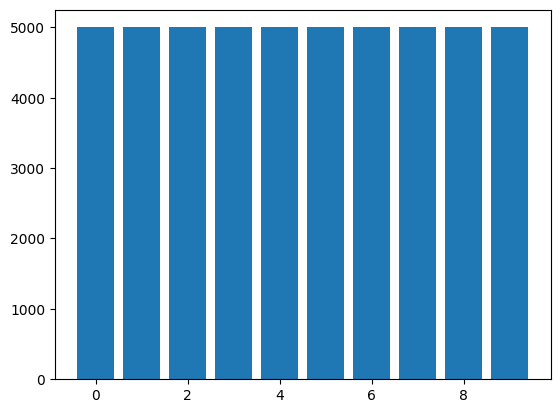

In [10]:
plt.bar(unique, counts)
plt.show()

## 1. MLP for Image Classification

In [11]:
mlp_model = models.Sequential(name="MLP_model")

mlp_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
mlp_model.add(layers.Flatten())
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

mlp_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
mlp_history = mlp_model.fit(X_train,
                            y_train,
                            epochs=50,
                            batch_size=256,
                            validation_split=0.1
                            )

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.2490 - loss: 2.0864 - val_accuracy: 0.3544 - val_loss: 1.8239
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3703 - loss: 1.7662 - val_accuracy: 0.3890 - val_loss: 1.7093
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4177 - loss: 1.6447 - val_accuracy: 0.4152 - val_loss: 1.6449
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4320 - loss: 1.5959 - val_accuracy: 0.4300 - val_loss: 1.6015
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4532 - loss: 1.5364 - val_accuracy: 0.4590 - val_loss: 1.5429
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4755 - loss: 1.4804 - val_accuracy: 0.4484 - val_loss: 1.5466
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4794 - loss: 1.4517 - val_accuracy: 0.4722 - val_loss: 1.4829
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4919 - loss: 1.4194 - val_accuracy: 0

In [13]:
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5076 - loss: 1.7948
Test Loss: 1.7995613813400269
Test Accuracy: 0.5067999958992004


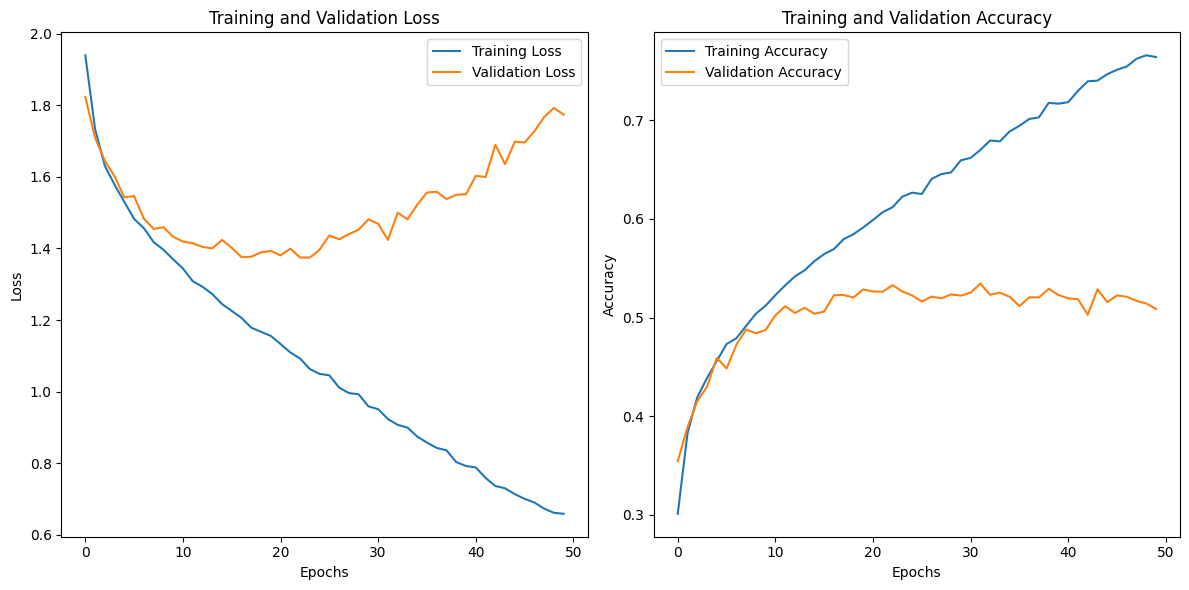

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
predictions_mlp = mlp_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [16]:
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

In [17]:
# what are the predictions?
predictions_mlp[0]

array([3.5309047e-04, 2.6661110e-01, 4.0411702e-03, 2.2195645e-02,
       6.6318625e-01, 3.4330215e-02, 4.0027735e-05, 8.7757699e-06,
       6.9223221e-05, 9.1644684e-03], dtype=float32)

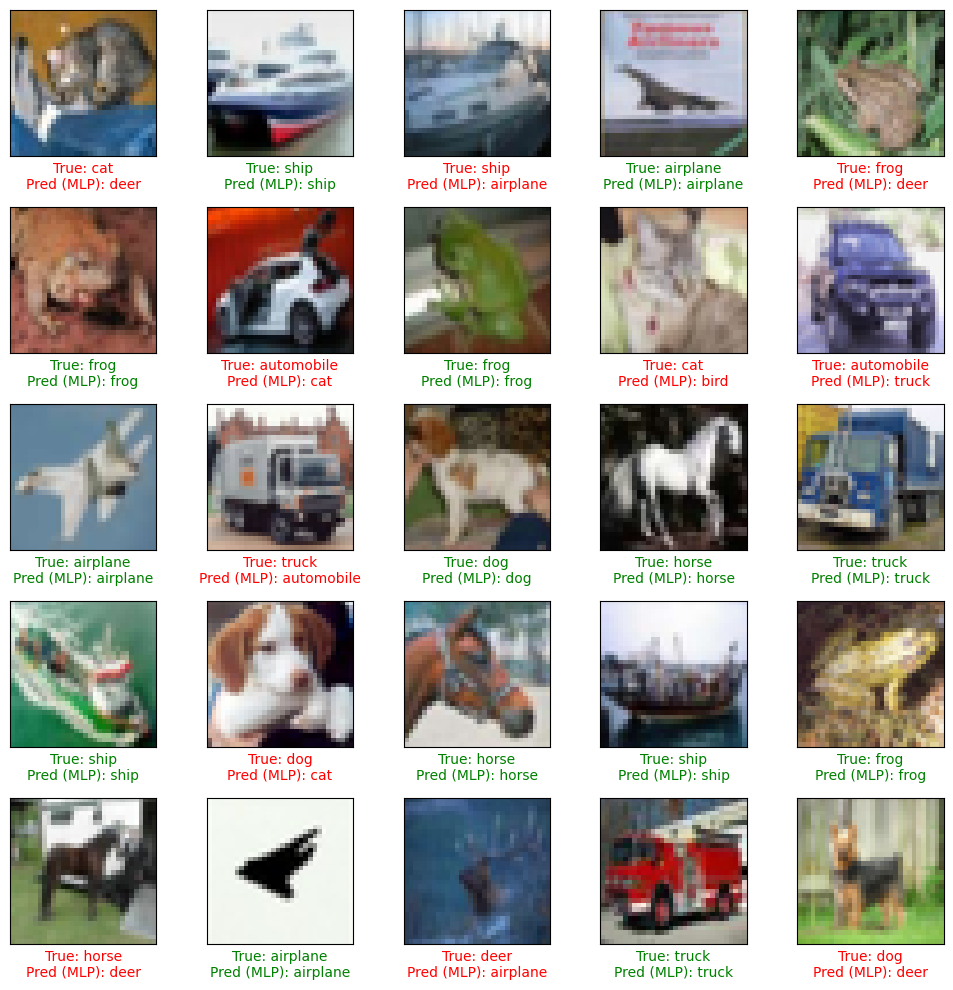

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]
    if true_label == predicted_label_mlp:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()
plt.show()

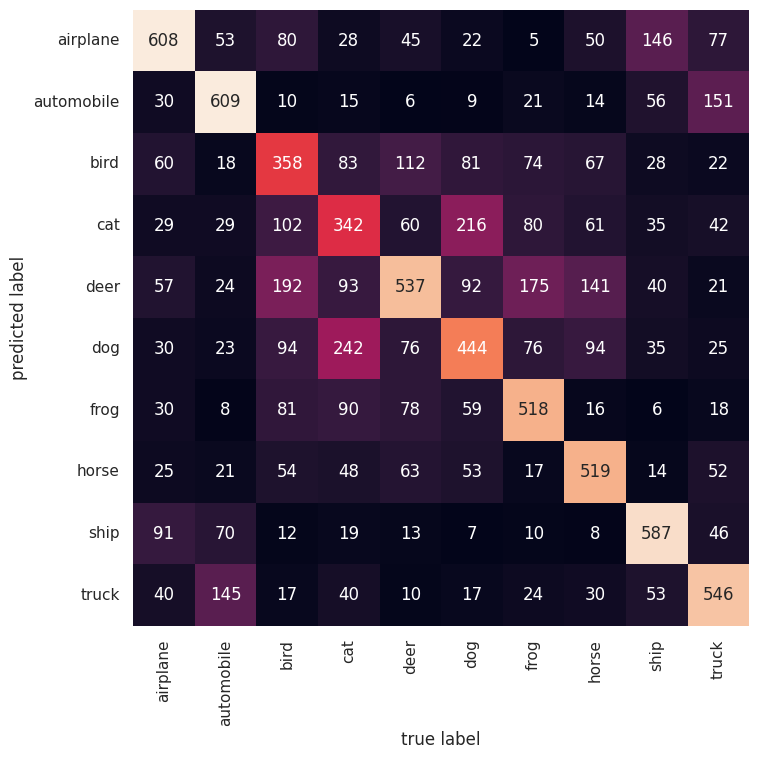

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

mat = confusion_matrix(y_test, predicted_labels_mlp)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [20]:
print(classification_report(y_test, predicted_labels_mlp, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.55      0.61      0.58      1000
  automobile       0.66      0.61      0.63      1000
        bird       0.40      0.36      0.38      1000
         cat       0.34      0.34      0.34      1000
        deer       0.39      0.54      0.45      1000
         dog       0.39      0.44      0.42      1000
        frog       0.57      0.52      0.54      1000
       horse       0.60      0.52      0.56      1000
        ship       0.68      0.59      0.63      1000
       truck       0.59      0.55      0.57      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000



## 2. CNN for Image Classification

In [21]:
cnn_model = models.Sequential(name="CNN_model")

cnn_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cnn_history = cnn_model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.2678 - loss: 1.9754 - val_accuracy: 0.4914 - val_loss: 1.4201
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4774 - loss: 1.4517 - val_accuracy: 0.5730 - val_loss: 1.2295
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5373 - loss: 1.3011 - val_accuracy: 0.6152 - val_loss: 1.0807
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5850 - loss: 1.1622 - val_accuracy: 0.6582 - val_loss: 0.9765
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6152 - loss: 1.0789 - val_accuracy: 0.6896 - val_loss: 0.9255
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6420 - loss: 1.0189 - val_accuracy: 0.7010 - val_loss: 0.8662
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6642 - loss: 0.9659 - val_accuracy: 0.7064 - val_loss: 0.8351
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6742 - loss: 0.9269 - val_acc

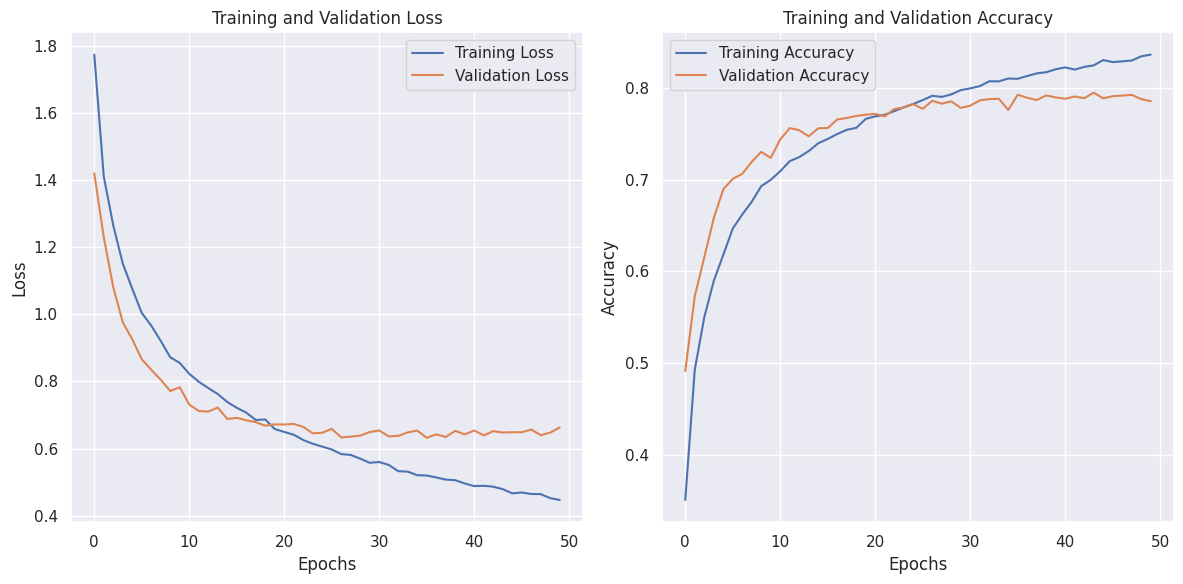

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7832 - loss: 0.6843
Test Loss: 0.6855083703994751
Test Accuracy: 0.7789000272750854


In [25]:
# Get predictions for the test set
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


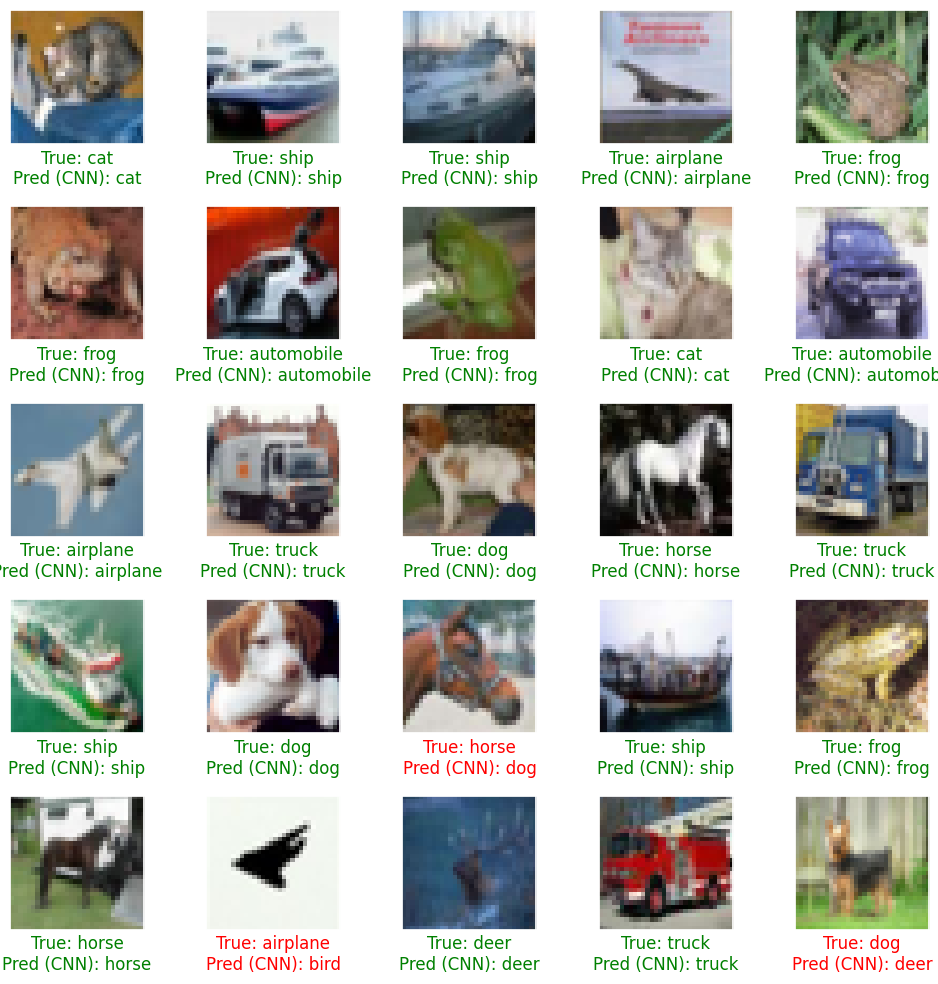

In [26]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels_cnn[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

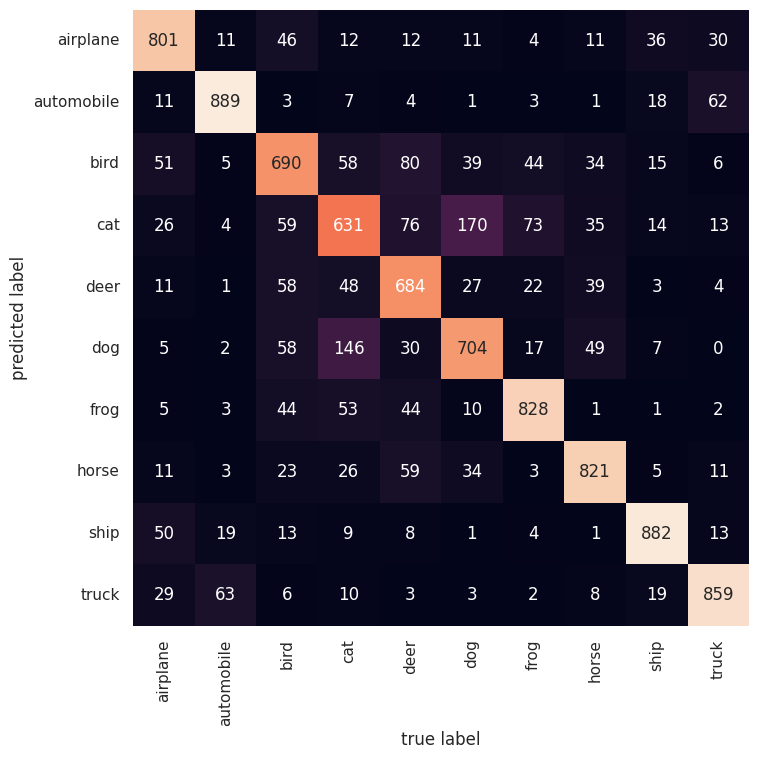

In [27]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [28]:
print(classification_report(y_test, predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.82      0.80      0.81      1000
  automobile       0.89      0.89      0.89      1000
        bird       0.68      0.69      0.68      1000
         cat       0.57      0.63      0.60      1000
        deer       0.76      0.68      0.72      1000
         dog       0.69      0.70      0.70      1000
        frog       0.84      0.83      0.83      1000
       horse       0.82      0.82      0.82      1000
        ship       0.88      0.88      0.88      1000
       truck       0.86      0.86      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [29]:
def build_improved_cnn():
    model = models.Sequential([
        layers.InputLayer(input_shape=(32, 32, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(10, activation='softmax')
    ], name="Improved_CNN_model")
    return model

In [30]:
improved_cnn_model = build_improved_cnn()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [31]:
optimizer = Adam(learning_rate=0.0005)

improved_cnn_model.compile(optimizer=optimizer,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

improved_cnn_model.summary()

Model: "Improved_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,312,202 (5.01 MB)

 Trainable params: 1,311,178 (5.00 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [32]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=1e-6,
                              verbose=1)

checkpoint = ModelCheckpoint('best_tuned_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True)

In [33]:
initial_epochs = 50

improved_cnn_history = improved_cnn_model.fit(X_train, y_train,
                                            epochs=initial_epochs,
                                            batch_size=256,
                                            validation_split=0.1,
                                            callbacks=[reduce_lr, early_stop, checkpoint])

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3776 - loss: 1.9320
Epoch 1: val_loss improved from inf to 3.03784, saving model to best_tuned_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 32s 115ms/step - accuracy: 0.3781 - loss: 1.9300 - val_accuracy: 0.1638 - val_loss: 3.0378 - learning_rate: 5.0000e-04
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5966 - loss: 1.1443
Epoch 2: val_loss did not improve from 3.03784
176/176 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5967 - loss: 1.1441 - val_accuracy: 0.1272 - val_loss: 3.1732 - learning_rate: 5.0000e-04
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6704 - loss: 0.9460
Epoch 3: val_loss improved from 3.03784 to 1.51342, saving model to best_tuned_model.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.6704 - loss: 0.9459 - val_accuracy: 0.4760 - val_loss: 1.5134 - learning_rate: 5.0000e-04
Epoch 4/50
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7093 -

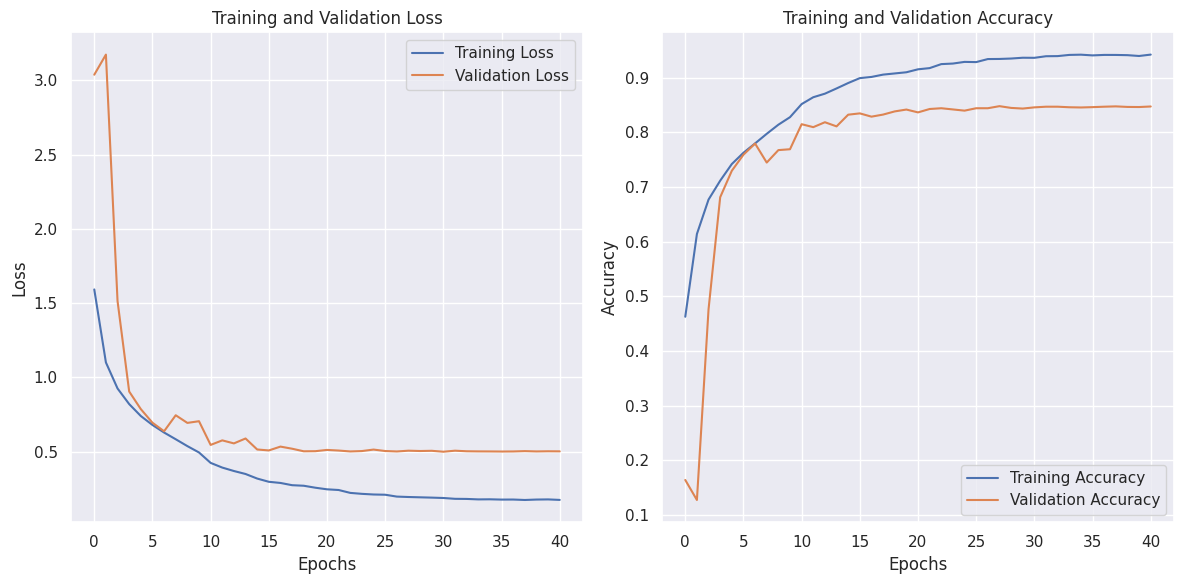

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(improved_cnn_history.history['loss'], label='Training Loss')
plt.plot(improved_cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(improved_cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(improved_cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
test_loss, test_accuracy = improved_cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8316 - loss: 0.5287
Test Loss: 0.5277332663536072
Test Accuracy: 0.8317000269889832


In [36]:
# Get predictions for the test set
improved_predictions_cnn = improved_cnn_model.predict(X_test)
improved_predicted_labels_cnn = np.argmax(improved_predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


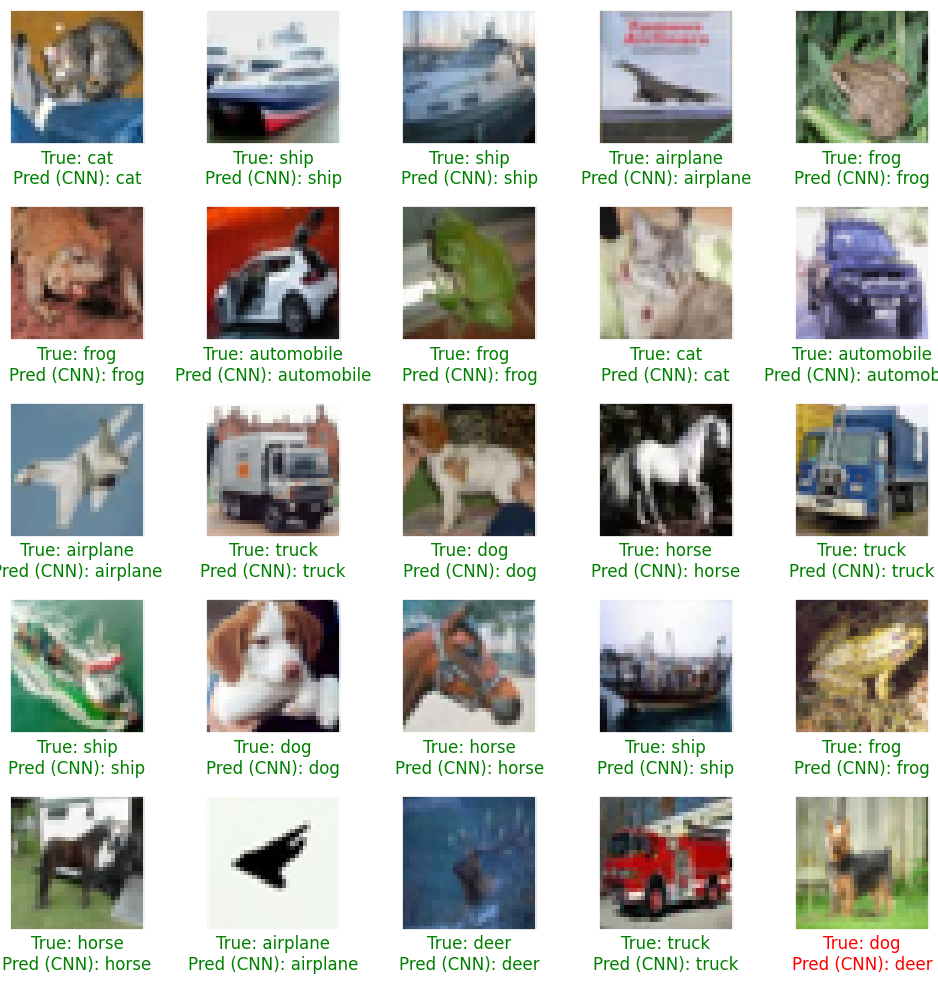

In [37]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    improved_predicted_label = class_names[improved_predicted_labels_cnn[i]]
    if true_label == improved_predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {improved_predicted_label}", color=color)
plt.tight_layout()
plt.show()

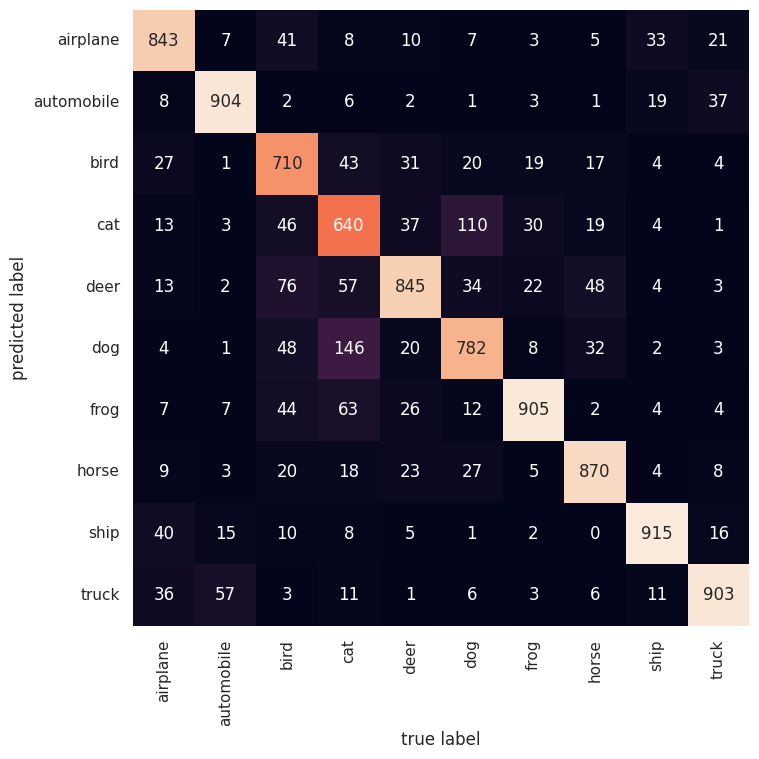

In [38]:
mat = confusion_matrix(y_test, improved_predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [39]:
print(classification_report(y_test, improved_predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.86      0.84      0.85      1000
  automobile       0.92      0.90      0.91      1000
        bird       0.81      0.71      0.76      1000
         cat       0.71      0.64      0.67      1000
        deer       0.77      0.84      0.80      1000
         dog       0.75      0.78      0.76      1000
        frog       0.84      0.91      0.87      1000
       horse       0.88      0.87      0.88      1000
        ship       0.90      0.92      0.91      1000
       truck       0.87      0.90      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000




The improved CNN used more filters in the convolutional layers (64 and 128 vs 32 and 64), added Batch Normalization layers, increased dropout rates in some layers, and used a smaller learning rate (0.0005 vs 0.001).

These changes led to improvement because:
- **More filters:** Allowed the model to learn more complex patterns.
- **Batch Normalization:** Stabilized training and allowed for higher learning rates.
- **Increased Dropout:** Reduced overfitting by randomly dropping connections during training.
- **Smaller Learning Rate:** Allowed the model to converge more slowly and potentially find a better minimum in the loss function.

Collectively, these adjustments helped the model learn features more effectively, generalize better to unseen data, and prevent overfitting, leading to improved performance.